Import all the required packages

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import lumicks.pylake as lk
import glob


Initialise the files

In [2]:
file = lk.File("sam_data/20240123-135716 FD Curve DNA_1_2um_sec 2.h5")
list(file.fdcurves)

['DNA_1_2um_sec']

Put them into a json

In [3]:
fd_curves ={}
key, curve = file.fdcurves.popitem()
fd_curves[key]  = curve


Initialise the Selector

interactive(children=(Dropdown(description='curve', options=('DNA_1_2um_sec',), value='DNA_1_2um_sec'), Output…

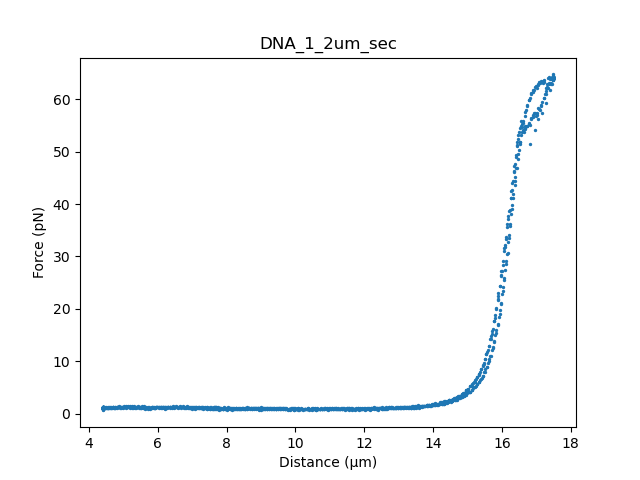

In [4]:
selector = lk.FdDistanceRangeSelector(fd_curves)
plt.show() 

In [6]:
fd_curve = file.fdcurves["DNA_1_2um_sec"]
fd_curve.plot_scatter()

In [7]:
m_odijk = lk.ewlc_odijk_force("DNA") + lk.force_offset("DNA")
fit_odijk = lk.FdFit(m_odijk)

In [8]:
for i , curve in enumerate(selector.fdcurves.values()):
    force_data = curve[0].f.data
    distance_data = curve[0].d.data
    fit_odijk[m_odijk].add_data(f"Selected data",
                        force_data[distance_data > 0.5e-6],
                        distance_data[distance_data > 0.5e-6])

In [9]:
fit_odijk["DNA/Lc"].value = 16
fit_odijk["DNA/Lp"].value = 50
fit_odijk["DNA/St"].value = 1500
fit_odijk["DNA/St"].lower_bound = 250
fit_odijk["DNA/f_offset"].upper_bound = 2
fit_odijk["DNA/f_offset"].lower_bound = -2

fit_odijk.fit()
fit_odijk

Name,Value,Unit,Fitted,Lower bound,Upper bound
DNA/Lp,48.1713,[nm],True,0.001,100
DNA/Lc,16.1661,[micron],True,0.00034,inf
DNA/St,1507.62,[pN],True,250,inf
kT,4.11,[pN*nm],False,3.77,8
DNA/f_offset,0.721191,[pN],True,-2,2


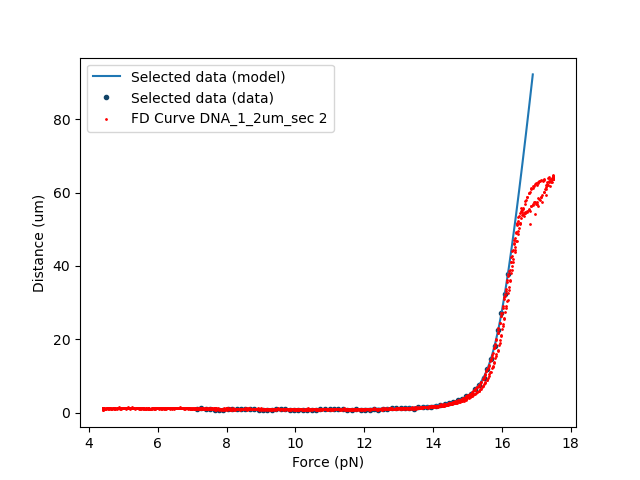

In [10]:
plt.figure()
fit_odijk[m_odijk].plot(independent=np.arange(10, 17, 0.1))
for name,fd in file.fdcurves.items():
    plt.scatter(fd.d.data, fd.f.data,s=1,c='r', label="FD Curve DNA_1_2um_sec 2")
plt.xlabel("Force (pN)")
plt.ylabel("Distance (um)")
plt.legend()
plt.show()

In [11]:
profile = fit_odijk.profile_likelihood('DNA/Lc', num_steps=1000, min_step=0.00001,confidence_level=0.95)
[profile.lower_bound, profile.upper_bound]

[16.131368217632733, 16.200145005830386]

Global Fit

In [12]:
fdcurves2={}
for filename in glob.glob('sam_data/*.h5'):
    file = lk.File(filename)
    key, curve = file.fdcurves.popitem()
    fdcurves2[key]  = curve
fdcurves2

{'DNA_4_1MNaCl_5um_sec': <lumicks.pylake.fdcurve.FdCurve at 0x14f8372e0>,
 'DNA_1_2um_sec': <lumicks.pylake.fdcurve.FdCurve at 0x17658f0a0>}

interactive(children=(Dropdown(description='curve', options=('DNA_4_1MNaCl_5um_sec', 'DNA_1_2um_sec'), value='…

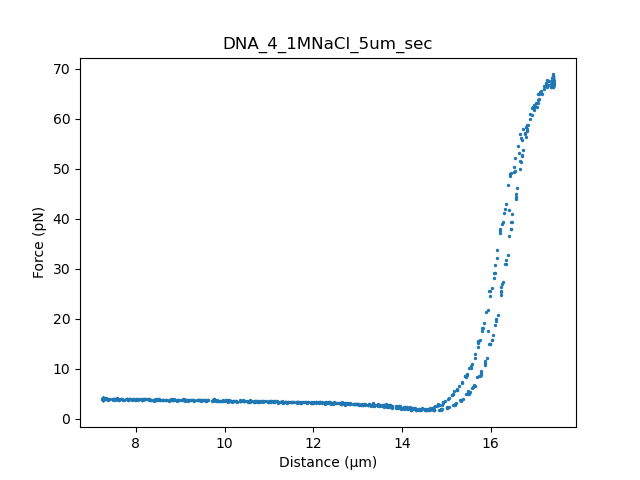

In [13]:
selector2 = lk.FdDistanceRangeSelector(fdcurves2)
plt.show()

In [14]:
fit = lk.FdFit(m_odijk)

In [16]:
for i, curve in enumerate(selector2.fdcurves.values()):
    force_data = curve[0].f.data
    distance_data = curve[0].d.data
    fit[m_odijk].add_data(f"Selected data {i}",
                        force_data[distance_data > 0.5e-6],
                        distance_data[distance_data > 0.5e-6])

In [17]:
fit["DNA/Lc"].value = 16
fit["DNA/Lp"].value = 50
fit["DNA/St"].value = 1500
fit["DNA/St"].lower_bound = 250
fit["DNA/f_offset"].upper_bound = 2
fit["DNA/f_offset"].lower_bound = -2

fit.fit()
fit

Name,Value,Unit,Fitted,Lower bound,Upper bound
DNA/Lp,100,[nm],True,0.001,100
DNA/Lc,16.0242,[micron],True,0.00034,inf
DNA/St,997.772,[pN],True,250,inf
kT,4.11,[pN*nm],False,3.77,8
DNA/f_offset,1.64646,[pN],True,-2,2


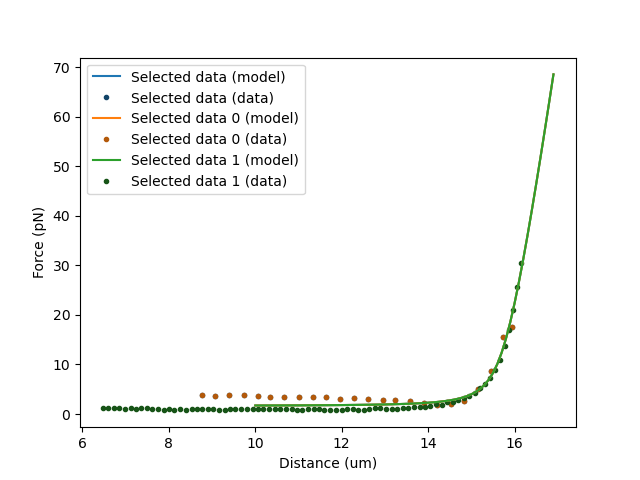

In [18]:
plt.figure()
fit[m_odijk].plot(independent=np.arange(10, 17, 0.1))
plt.ylabel("Force (pN)")
plt.xlabel("Distance (um)")
plt.legend()
plt.show()


In [ ]:
profile = fit.profile_likelihood('DNA/Lc', num_steps=1000, min_step=0.00001,confidence_level=0.95)
[profile.lower_bound, profile.upper_bound]